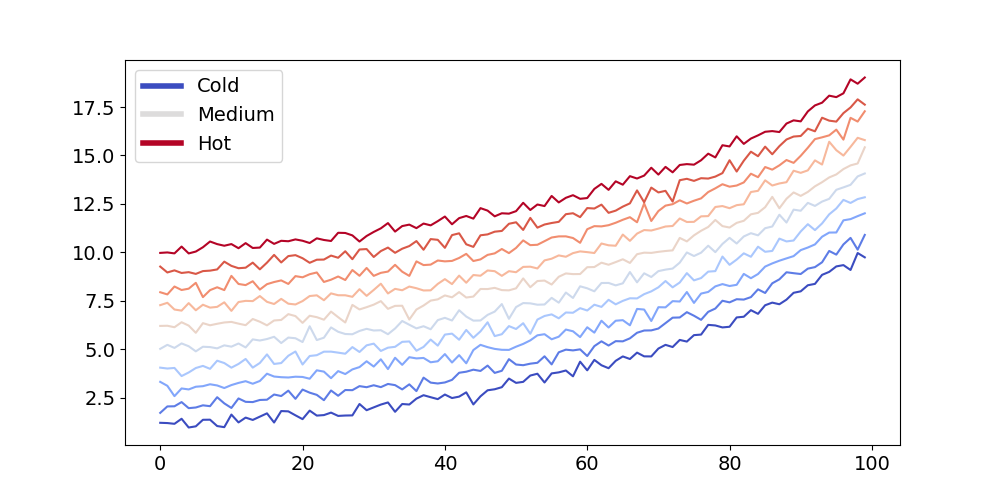

In [16]:
def make_fig(figsize):
    from matplotlib import rcParams, cycler
    import matplotlib.pyplot as plt
    import numpy as np
    plt.ion()

    # Fixing random state for reproducibility
    np.random.seed(19680801)

    N = 10
    data = [np.logspace(0, 1, 100) + .2 * np.random.randn(100) + ii for ii in range(N)]
    data = np.array(data).T
    cmap = plt.cm.coolwarm
    rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


    from matplotlib.lines import Line2D
    custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                    Line2D([0], [0], color=cmap(.5), lw=4),
                    Line2D([0], [0], color=cmap(1.), lw=4)]

    fig, ax = plt.subplots(figsize=figsize)
    lines = ax.plot(data)
    ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
make_fig(figsize=(10, 5))

````{margin} 
BUENAS
```python
make_fig(figsize=(10, 5))
``` 
````

````{div} full-width
```{note}
Here's a note that will take the full width
```
```python
make_fig(figsize=(10, 5))
````

````{sidebar} My sidebar title
My sidebar content
```python
make_fig(figsize=(10, 5))
```
```{note}

que pasa buenas
```
````

## Transformada de Laplace
Los entendidos dicen que el chisme este es lo mas cerca que puedes estar a tomar un sistema y restarle 2 o 3 años de matemática avanzada a la dificultad de su resolución solo con aplicarla. Por ejemplo podrías transformar una PDE en una ODE, que es más facil de resolver. Del mismo modo, también se podría transformar una ODE en una simple ecuación algebraica. Total, que al final donde es más útil esta cosa es en teoría de control.

$$ \mathscr{L}\{f(t)\}=\int_{t=0}^{\infty}f(t)e^{-st}dt $$

No asustarse: la primera parte quiere decir que la transformada de laplace $\mathscr{L}$ se aplica sobre una función que varía en el tiempo $f(t)$. Esta función $f(t)$ (osea, cualquier función que tengamos entre manos) se multiplica por un exponencial decreciente $e^{-st}$. Así lo que se obtiene es una conversión de una función expresada en función del tiempo $t$, a otra función expresada en base al plano complejo (o frecuencia compleja) $s$. 

```{code-cell} ipython3
from numpy import exp, linspace
import matplotlib.pyplot as plt

time = linspace(0,1,50)
s = 5 # valor de la frecuancia compleja, no tiene por qué ser un entero
ft = exp(-s*time)

plt.plot(time,ft)
```

```{code-cell} ipython3
:tags: ["full-width"]
print("This is a test.")
```

```python
:tags: [margin]
#sto sale? markdown

from numpy import exp, linspace
import matplotlib.pyplot as plt

time = linspace(0,1,50)
s = 5 # valor de la frecuancia compleja, no tiene por qué ser un entero
ft = exp(-s*time)

plt.plot(time,ft)
```

````{margin}
esto sale o no sale o que ostias
```{code-cell} ipython3
from numpy import exp, linspace
import matplotlib.pyplot as plt

time = linspace(0,1,50)
s = 5 # valor de la frecuancia compleja, no tiene por qué ser un entero
ft = exp(-s*time)

plt.plot(time,ft)
```
````

````{margin}
esto sale o no sale o que ostias con python
```python
from numpy import exp, linspace
import matplotlib.pyplot as plt

time = linspace(0,1,50)
s = 5 # valor de la frecuancia compleja, no tiene por qué ser un entero
ft = exp(-s*time)

plt.plot(time,ft)
```
````

```{warning}
En muchos sitios la integral aparece definida desde $-\infty$ a $\infty$. Por lo general, para menesteres ingenieríles nos quedamos con la integral desde $0$ a $\infty$, y dejaremos la parte negativa para movidas más matematicas.
```

````{note}
esto sale o no sale o que ostias what
```{code-cell} ipython3
from numpy import exp, linspace
import matplotlib.pyplot as plt

time = linspace(0,1,50)
s = 5 # valor de la frecuancia compleja, no tiene por qué ser un entero
ft = exp(-s*time)

plt.plot(time,ft)
```
````

## Ejemplo de para qué sirve la TL

Escribo esta frase para ver si se realizan los cambios.


Imaginemos que nuestra función es un simple seno:

$$f(t) = sin(\omega t)$$

Aplicar la Transformada de Laplace sobre ella hemos dicho que era simplemente multiplicarla por un exponencial decreciente $e^{-st}$:

$$ F(s) = \int_{t=0}^{\infty}sin(\omega t)e^{-st}dt $$

Para los despistaos: $F(s)$ es lo mismo que $\mathscr{L}\{f(t)\}$. Seguimos con la demostración.
La resolución de esa integral no es inmediata, pero se pueden aplicar relaciones trigonométricas como this one: $sin(\omega t) = \frac{e^{j\omega t}-e^{-j\omega t}}{2j}$, la cual se puede obtener partiendo de la ecuación de euler. Pero vamos que no te lies con esas mierdas que no es importante para entender la TL. Estamos operando solo:

$$ F(s) = \int_{t=0}^{\infty}\frac{e^{j\omega t}-e^{-j\omega t}}{2j}e^{-st}dt $$

$$ F(s) = \int_{t=0}^{\infty}\frac{e^{-(s-j\omega)t}-e^{-(s+j\omega)t}}{2j}dt $$

La integral de una exponencial es:
$$  \int_{t_1}^{t_2} e^{\alpha t} dt= \frac{e^{\alpha t_2}}{\alpha}-\frac{e^{\alpha t_1}}{\alpha} $$

Aplicamos:
$$ F(s) = \frac{1}{2j} \left( \left[ \frac{e^{-(s-j\omega)0}-e^{-(s+j\omega)\infty}}{s-j\omega} \right] -\left[ \frac{e^{-(s-j\omega)0}-e^{-(s+j\omega)\infty}}{s+j\omega} \right] \right) $$

Sabemos que:

* $e^{-(s-j\omega) 0} = e^{0} = 0$
* $e^{-(s-j\omega)\infty} = e^{-\infty} = 0$

$$ F(s) = \frac{1}{2j} \left( \left[ \frac{1-0}{s-j\omega} \right] -\left[ \frac{1-0}{s+j\omega} \right] \right) = \frac{1}{2j} \left(  \frac{1}{s-j\omega}  -\frac{1}{s+j\omega}  \right) = \frac{\omega}{s^2 + \omega^2} $$

De esta manera hemos convertido una ecuacion sinusoidal en un polinomio de segundo orden usando la Transformada de Laplace.

## Plano complejo s

$ s = \sigma + j\omega, \hspace{2em} siendo  \hspace{2em} j= \sqrt[]{-1}$

Se usa porque con estpo se puede modelar cualquier sinusoide.

$$e^{st} = e^{(\sigma +j\omega)t} = e^{\sigma t +j\omega t} = e^{\sigma t}e^{j\omega t}$$
Esto es lo mismo que antes, tenemos una función en función del tiempo $e^{j \omega t}$, multiplicada por una exponencial que puede ser creciente o decreciente según el valor de $\sigma$

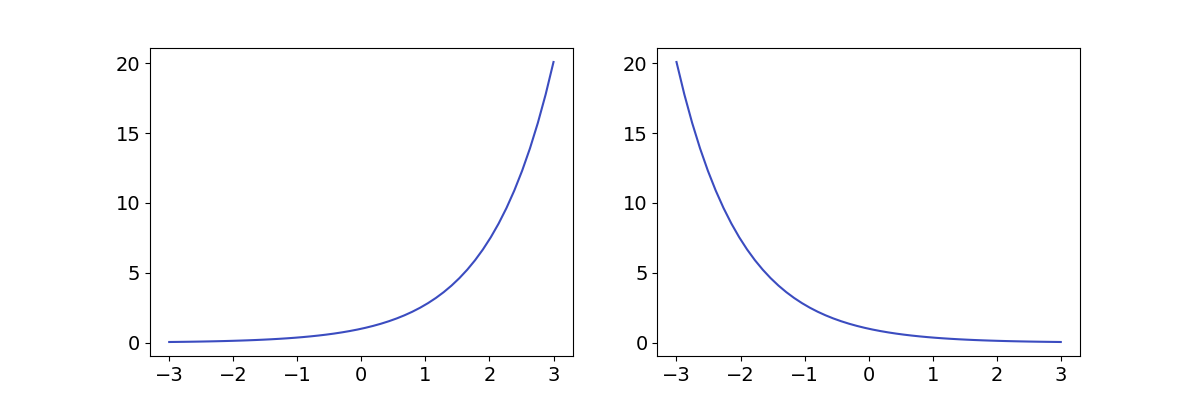

In [9]:
%matplotlib widget
from numpy import exp, linspace
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize = (12,4))

time = linspace(-3,3,50)
sigma = -1 # valor de la frecuancia compleja, no tiene por qué ser un entero
ft = exp(-sigma*time)
ax[0].plot(time,ft)

sigma = 1 # valor de la frecuancia compleja, no tiene por qué ser un entero
ft = exp(-sigma*time)
ax[1].plot(time,ft)

In [3]:
import numpy as np

def rect(x, B):
    """
    create a rectangle function
    returns a numpy array that is 1 if |x| < w and 0 if |x| > w
    B is the rectangle width centered at 0
    x is the number of points in the array
    """
    
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))    
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]

    return rect

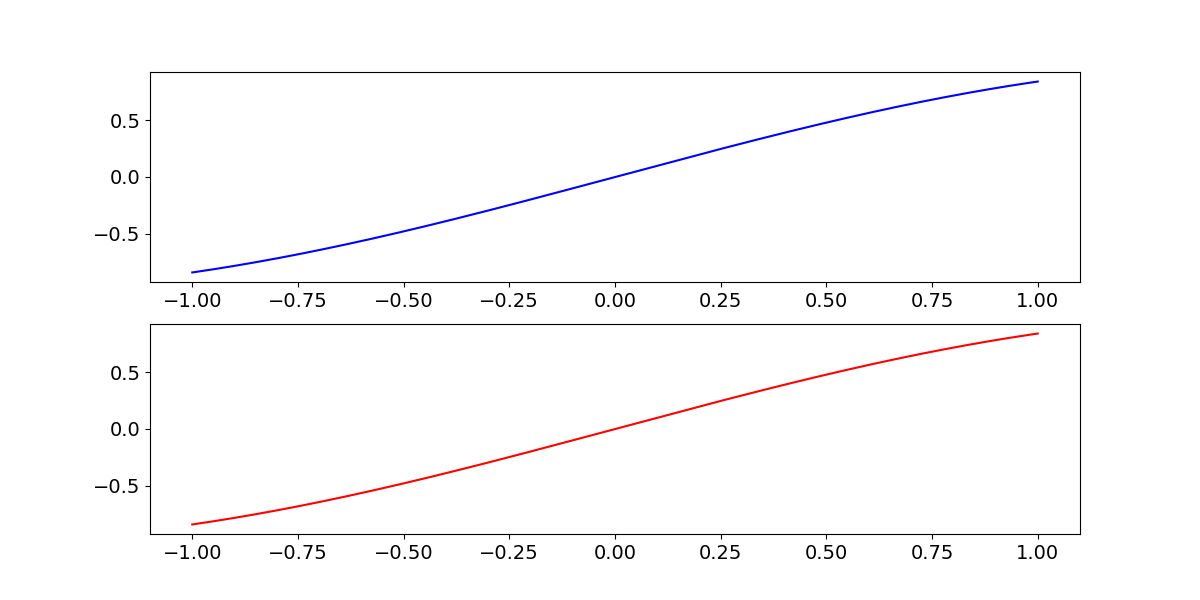

In [15]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')
# constants and x array
pi = np.pi
length = 2000
x = np.linspace(-1, 1, length)

# create figure and axes 
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))

# creating our line objects for the plots
sinc, = ax1.plot(x, np.sin(x), '-b')
box, = ax2.plot(x, np.sin(x), '-r')

def animate(B):
    """
    this function gets called by FuncAnimation
    each time called, it will replot with a different width "B"
    
    B: rect width
    
    return:
        sinc: ydata
        box: ydata
    """
    
    # create our rect object
    f = rect(len(x), B)
    box.set_ydata(f)
    
    # create our sinc object
    F = (B / length) * np.sin(x * B / 2) / (x * B / 2)
    sinc.set_ydata(F)
    
    # adjust the sinc plot height in a loop
    ax1.set_ylim(np.min(F), np.max(F))
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[-0.25, 0.25], xticklabels=['-1/4', '1/4'],
             yticks=[0, np.max(F)], yticklabels=['0', 'B={:.2f}'.format((B / length))])
    
    # format the ax2 xticks to move with the box
    plt.setp(ax2, yticks=[0, 1], 
             xticks=[-1, -1 * B / length, 1 * B / length, 1], xticklabels=['-1', '-B/2', 'B/2', '1'])
    
def init():
    """
    initialize the figure
    """
    
    ax2.set_ylim(-0.2, 1.1)
    ax1.set_xlim(-0.25, 0.25)
    ax2.set_xlim(-1, 1)
    ax1.axhline(0, color='black', lw=1)
    ax2.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return sinc, box,

# the FuncAnimation function iterates through our animate function using the steps array
step = 10
steps = np.append(np.arange(10, 1000, step), np.arange(1000, 10, -1 * step))
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
